Import the necessary packages

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import the dataset, including class, identification, measurement, error data

In [45]:
# import dataset
## class data
neg_class = pd.read_csv('/Users/biano/Desktop/20231204_Cell-Death_Metabolite_Sup_HMDB/Processed_Data/identification/hmdb/neg_HMDB_class.csv')
pos_class = pd.read_csv('/Users/biano/Desktop/20231204_Cell-Death_Metabolite_Sup_HMDB/Processed_Data/identification/hmdb/pos_HMDB_class.csv')

## iden data
neg_iden = pd.read_csv('/Users/biano/Desktop/20231204_Cell-Death_Metabolite_Sup_HMDB/Processed_Data/identification/water/neg_iden_multi.csv')
pos_iden = pd.read_csv('/Users/biano/Desktop/20231204_Cell-Death_Metabolite_Sup_HMDB/Processed_Data/identification/water/pos_iden_multi.csv')

## error data
neg_error = pd.read_csv('/Users/biano/Desktop/20231204_Cell-Death_Metabolite_Sup_HMDB/Processed_Data/identification/hmdb/Negative Error Data.csv')
pos_error = pd.read_csv('/Users/biano/Desktop/20231204_Cell-Death_Metabolite_Sup_HMDB/Processed_Data/identification/hmdb/Positive Error Data.csv')

# measurement data
neg_measure = pd.read_csv('/Users/biano/Desktop/20231204_Cell-Death_Metabolite_Sup_HMDB/Processed_Data/measurement/neg_filtered.csv')
pos_measure = pd.read_csv('/Users/biano/Desktop/20231204_Cell-Death_Metabolite_Sup_HMDB/Processed_Data/measurement/pos_filtered.csv')

Clean up the data

In [46]:
# remove link & Adducts
neg_iden = neg_iden.drop(['Link', 'Adducts'], axis = 1)
pos_iden = pos_iden.drop(['Link', 'Adducts'], axis = 1)

In [47]:
# remove the data with status == 'error'
neg_iden = neg_iden[neg_iden['status'] != 'error']
pos_iden = pos_iden[pos_iden['status'] != 'error']

KeyError: 'status'

In [48]:
print(len(neg_iden))
print(len(pos_iden))

4752
4122


Check the condition for filtering the data

In [49]:
# check how many compounds are 'Predicted'
print(sum(neg_iden['status'] == 'Predicted'))
print(sum(pos_iden['status'] == 'Predicted'))

KeyError: 'status'

In [8]:
# Check how many compounds' mass error are between -5 ~  5 ppm
print(sum((neg_iden['Mass Error (ppm)'] >= -5) & (neg_iden['Mass Error (ppm)'] <= 5)))
print(sum((pos_iden['Mass Error (ppm)'] >= -5) & (pos_iden['Mass Error (ppm)'] <= 5)))

2095
1777


In [9]:
# Check how many compound are belong to lipid
print(sum(neg_iden['class'].str.contains('lipid', na=False)))
print(sum(neg_iden['class'].str.contains('Fatty', na = False)))
print(sum(pos_iden['class'].str.contains('lipid', na=False)))
print(sum(pos_iden['class'].str.contains('Fatty', na = False)))

1766
162
1009
197


### Predicted compound
* Positive: 1627
* Negative: 1530

### Mass error -5 ~ 5
* Positive: 1777
* Negative: 2095

### Lipid:
* Positive: 1009
* Negative: 1766

### Fatty:
* Positive: 197
* Negative: 162

## Narrow down base on several factor

### Class == lipid or fatty

In [13]:
# remove the row with class contain "lipid" or "fatty"
neg_iden_clean = neg_iden[~neg_iden['class'].str.contains('lipid', na=False)]
neg_iden_clean = neg_iden_clean[~neg_iden_clean['class'].str.contains('Fatty', na=False)]

pos_iden_clean = pos_iden[~pos_iden['class'].str.contains('lipid', na=False)]
pos_iden_clean = pos_iden_clean[~pos_iden_clean['class'].str.contains('Fatty', na=False)]

# remove the row with status = 'Predicted'
neg_iden_clean = neg_iden_clean[neg_iden_clean['status'] != 'Predicted']
pos_iden_clean = pos_iden_clean[pos_iden_clean['status'] != 'Predicted']

print(len(neg_iden))
print(len(neg_iden_clean))
print(len(pos_iden))
print(len(pos_iden_clean))

4558
1113
3958
1182


### Mass error between -5 ~ 5 ppm

In [16]:
# narrow down the data with mass error within 5 ~ -5 ppm
neg_iden_ppm = neg_iden[(neg_iden['Mass Error (ppm)'] >= -5) & (neg_iden['Mass Error (ppm)'] <= 5)]
pos_iden_ppm = pos_iden[(pos_iden['Mass Error (ppm)'] >= -5) & (pos_iden['Mass Error (ppm)'] <= 5)]

print(len(neg_iden))
print(len(pos_iden))
print(len(neg_iden_ppm))
print(len(pos_iden_ppm))

4558
3958
2095
1777


### Mass error between -5 ~ 5 ppm + class == lipid or fatty

In [18]:
neg_iden_clean_ppm = neg_iden_clean[(neg_iden_clean['Mass Error (ppm)'] >= -5) & (neg_iden_clean['Mass Error (ppm)'] <= 5)]
pos_iden_clean_ppm = pos_iden_clean[(pos_iden_clean['Mass Error (ppm)'] >= -5) & (pos_iden_clean['Mass Error (ppm)'] <= 5)]

## Remove first column in measurement data

In [19]:
neg_measure = neg_measure.iloc[:, 1:]
neg_measure

,Compound,iden,DMSO mean,STS mean,Fas mean,RSL mean,Nec mean,BK 10x
0,1.91_775.6383n,2,92.567703,871.918412,1477.086489,1229.490921,1159.533564,212.909419
1,4.95_1152.7123n,14,2757.207872,4811.433025,4681.827280,2096.472503,7329.181111,4006.922451
2,2.13_490.2023n,1,259.173798,11772.712773,3196.552468,14631.170861,1118.028861,7931.616236
3,1.91_612.1559n,1,982.190822,8236.751580,8226.695852,4534.396839,6901.001788,7203.714245
4,0.51_386.0208m/z,1,932.646159,289.613490,430.976804,507.637028,282.843901,276.312155
...,...,...,...,...,...,...,...,...
631,0.55_128.0704m/z,18,85.726530,36.804578,76.177917,285.894791,80.419558,0.000000
632,0.53_1067.1264m/z,1,0.000000,0.000000,0.000000,205.013069,0.000000,0.000000
633,0.53_641.1329m/z,2,103.384659,22.708988,94.565213,817.557957,55.498041,521.464924
634,0.53_362.0506m/z,6,310.452428,275.637562,444.080976,1752.891578,52.589923,1682.956939


In [20]:
pos_measure = pos_measure.iloc[:, 1:]
pos_measure

,Compound,iden,DMSO mean,STS mean,Fas mean,RSL mean,Nec mean,BK 10x
0,1.14_612.1517n,1,2288.762815,1207.620813,4947.243497,20650.331413,5625.070807,0.000000
1,1.14_363.0570n,6,1.303366,162.842989,174.262227,119.068905,19.816518,17.867474
2,1.14_347.0624n,9,51.615830,68.153687,121.794285,2083.027081,20.412975,0.000000
3,1.14_307.0837n,5,171.177438,220.141501,1099.934485,5647.605221,3064.169156,45.887168
4,1.14_151.0492n,5,6726.095722,4413.851235,6010.176872,5344.530618,4225.882886,3272.109549
...,...,...,...,...,...,...,...,...
573,0.88_104.1077m/z,1,6672.044058,2234.319747,3233.946701,6359.403890,3520.328454,5881.201152
574,0.87_280.0937m/z,4,48.959334,72.988210,108.370346,232.016521,127.140110,168.495787
575,0.77_318.9369m/z,2,10.350023,24.535820,22.372632,23.694289,8.940672,0.000000
576,0.77_203.2228m/z,1,906.234939,11322.564459,11648.200197,4601.994077,9660.839256,0.000000


## Check how many compounds would remain in measure data after filtered by iden data

In [21]:
# with original identification data
print(sum(neg_measure['Compound'].isin(neg_iden['Compound'])))
print(sum(pos_measure['Compound'].isin(pos_iden['Compound'])))

461
409


In [22]:
# with ppm data
print(sum(neg_measure['Compound'].isin(neg_iden_ppm['Compound'])))
print(sum(pos_measure['Compound'].isin(pos_iden_ppm['Compound'])))

286
271


In [23]:
# with clean data
print(sum(neg_measure['Compound'].isin(neg_iden_clean['Compound'])))
print(sum(pos_measure['Compound'].isin(pos_iden_clean['Compound'])))

296
281


In [24]:
# with clean_ppm data
print(sum(neg_measure['Compound'].isin(neg_iden_clean_ppm['Compound'])))
print(sum(pos_measure['Compound'].isin(pos_iden_clean_ppm['Compound'])))

188
196


### With original identification data
* Positive: 409
* Negative: 461

### With ppm data
* Positive: 271
* Negative: 286

### With clean data (remove lipid and fatty acid)
* Positive: 350
* Negative: 371

### With clean_ppm data
* Positive: 235
* Negative: 232


## Filter measurement data

### base on original identification data

In [25]:
neg_measure_iden = neg_measure[neg_measure['Compound'].isin(neg_iden['Compound'])]
neg_measure_iden = neg_measure.drop(columns='BK 10x')
neg_measure_iden

,Compound,iden,DMSO mean,STS mean,Fas mean,RSL mean,Nec mean
0,1.91_775.6383n,2,92.567703,871.918412,1477.086489,1229.490921,1159.533564
1,4.95_1152.7123n,14,2757.207872,4811.433025,4681.827280,2096.472503,7329.181111
2,2.13_490.2023n,1,259.173798,11772.712773,3196.552468,14631.170861,1118.028861
3,1.91_612.1559n,1,982.190822,8236.751580,8226.695852,4534.396839,6901.001788
4,0.51_386.0208m/z,1,932.646159,289.613490,430.976804,507.637028,282.843901
...,...,...,...,...,...,...,...
631,0.55_128.0704m/z,18,85.726530,36.804578,76.177917,285.894791,80.419558
632,0.53_1067.1264m/z,1,0.000000,0.000000,0.000000,205.013069,0.000000
633,0.53_641.1329m/z,2,103.384659,22.708988,94.565213,817.557957,55.498041
634,0.53_362.0506m/z,6,310.452428,275.637562,444.080976,1752.891578,52.589923


In [26]:
pos_measure_iden = pos_measure[pos_measure['Compound'].isin(pos_iden['Compound'])]
pos_measure_iden = pos_measure.drop(columns='BK 10x')
pos_measure_iden

,Compound,iden,DMSO mean,STS mean,Fas mean,RSL mean,Nec mean
0,1.14_612.1517n,1,2288.762815,1207.620813,4947.243497,20650.331413,5625.070807
1,1.14_363.0570n,6,1.303366,162.842989,174.262227,119.068905,19.816518
2,1.14_347.0624n,9,51.615830,68.153687,121.794285,2083.027081,20.412975
3,1.14_307.0837n,5,171.177438,220.141501,1099.934485,5647.605221,3064.169156
4,1.14_151.0492n,5,6726.095722,4413.851235,6010.176872,5344.530618,4225.882886
...,...,...,...,...,...,...,...
573,0.88_104.1077m/z,1,6672.044058,2234.319747,3233.946701,6359.403890,3520.328454
574,0.87_280.0937m/z,4,48.959334,72.988210,108.370346,232.016521,127.140110
575,0.77_318.9369m/z,2,10.350023,24.535820,22.372632,23.694289,8.940672
576,0.77_203.2228m/z,1,906.234939,11322.564459,11648.200197,4601.994077,9660.839256


### base on ppm data

In [27]:
neg_measure_ppm = neg_measure[neg_measure['Compound'].isin(neg_iden_ppm['Compound'])]
neg_measure_ppm = neg_measure_ppm.drop(columns='BK 10x')
neg_measure_ppm

,Compound,iden,DMSO mean,STS mean,Fas mean,RSL mean,Nec mean
1,4.95_1152.7123n,14,2757.207872,4811.433025,4681.827280,2096.472503,7329.181111
5,0.51_611.1454m/z,1,173.447799,89.255274,339.040271,2119.591137,486.028635
6,0.53_198.0399m/z,5,183.253967,81.526862,168.832567,568.847811,129.299032
7,0.55_172.0600m/z,4,2297.109797,1046.823146,2022.522073,8179.865426,1794.278135
8,0.55_418.9552m/z,5,56.261195,354.563851,536.650997,470.452775,415.178050
...,...,...,...,...,...,...,...
630,0.55_173.0636m/z,1,188.904521,92.528819,180.224687,604.114648,154.073892
632,0.53_1067.1264m/z,1,0.000000,0.000000,0.000000,205.013069,0.000000
633,0.53_641.1329m/z,2,103.384659,22.708988,94.565213,817.557957,55.498041
634,0.53_362.0506m/z,6,310.452428,275.637562,444.080976,1752.891578,52.589923


In [28]:
pos_measure_ppm = pos_measure[pos_measure['Compound'].isin(pos_iden_ppm['Compound'])]
pos_measure_ppm = pos_measure_ppm.drop(columns='BK 10x')
pos_measure_ppm

,Compound,iden,DMSO mean,STS mean,Fas mean,RSL mean,Nec mean
0,1.14_612.1517n,1,2288.762815,1207.620813,4947.243497,20650.331413,5625.070807
1,1.14_363.0570n,6,1.303366,162.842989,174.262227,119.068905,19.816518
2,1.14_347.0624n,9,51.615830,68.153687,121.794285,2083.027081,20.412975
3,1.14_307.0837n,5,171.177438,220.141501,1099.934485,5647.605221,3064.169156
6,2.19_311.1233n,3,84.609149,203.013555,301.819138,137.240405,197.514217
...,...,...,...,...,...,...,...
568,0.94_217.0680m/z,18,142.820780,155.023471,197.785759,130.620489,274.431095
571,0.90_489.1141m/z,5,3.254588,13.805110,36.238894,122.970295,9.008443
574,0.87_280.0937m/z,4,48.959334,72.988210,108.370346,232.016521,127.140110
575,0.77_318.9369m/z,2,10.350023,24.535820,22.372632,23.694289,8.940672


### base on clean data

In [29]:
neg_measure_clean = neg_measure[neg_measure['Compound'].isin(neg_iden_clean['Compound'])]
neg_measure_clean = neg_measure_clean.drop(columns='BK 10x')
neg_measure_clean

,Compound,iden,DMSO mean,STS mean,Fas mean,RSL mean,Nec mean
2,2.13_490.2023n,1,259.173798,11772.712773,3196.552468,14631.170861,1118.028861
3,1.91_612.1559n,1,982.190822,8236.751580,8226.695852,4534.396839,6901.001788
5,0.51_611.1454m/z,1,173.447799,89.255274,339.040271,2119.591137,486.028635
6,0.53_198.0399m/z,5,183.253967,81.526862,168.832567,568.847811,129.299032
7,0.55_172.0600m/z,4,2297.109797,1046.823146,2022.522073,8179.865426,1794.278135
...,...,...,...,...,...,...,...
631,0.55_128.0704m/z,18,85.726530,36.804578,76.177917,285.894791,80.419558
632,0.53_1067.1264m/z,1,0.000000,0.000000,0.000000,205.013069,0.000000
633,0.53_641.1329m/z,2,103.384659,22.708988,94.565213,817.557957,55.498041
634,0.53_362.0506m/z,6,310.452428,275.637562,444.080976,1752.891578,52.589923


In [30]:
pos_measure_clean = pos_measure[pos_measure['Compound'].isin(pos_iden_clean['Compound'])]
pos_measure_clean = pos_measure_clean.drop(columns='BK 10x')
pos_measure_clean

,Compound,iden,DMSO mean,STS mean,Fas mean,RSL mean,Nec mean
0,1.14_612.1517n,1,2288.762815,1207.620813,4947.243497,20650.331413,5625.070807
1,1.14_363.0570n,6,1.303366,162.842989,174.262227,119.068905,19.816518
2,1.14_347.0624n,9,51.615830,68.153687,121.794285,2083.027081,20.412975
3,1.14_307.0837n,5,171.177438,220.141501,1099.934485,5647.605221,3064.169156
6,2.19_311.1233n,3,84.609149,203.013555,301.819138,137.240405,197.514217
...,...,...,...,...,...,...,...
568,0.94_217.0680m/z,18,142.820780,155.023471,197.785759,130.620489,274.431095
571,0.90_489.1141m/z,5,3.254588,13.805110,36.238894,122.970295,9.008443
574,0.87_280.0937m/z,4,48.959334,72.988210,108.370346,232.016521,127.140110
575,0.77_318.9369m/z,2,10.350023,24.535820,22.372632,23.694289,8.940672


### base on clean_ppm data

In [31]:
neg_measure_clean_ppm = neg_measure[neg_measure['Compound'].isin(neg_iden_clean_ppm['Compound'])]
neg_measure_clean_ppm = neg_measure_clean_ppm.drop(columns='BK 10x')
neg_measure_clean_ppm

,Compound,iden,DMSO mean,STS mean,Fas mean,RSL mean,Nec mean
5,0.51_611.1454m/z,1,173.447799,89.255274,339.040271,2119.591137,486.028635
6,0.53_198.0399m/z,5,183.253967,81.526862,168.832567,568.847811,129.299032
7,0.55_172.0600m/z,4,2297.109797,1046.823146,2022.522073,8179.865426,1794.278135
8,0.55_418.9552m/z,5,56.261195,354.563851,536.650997,470.452775,415.178050
11,0.55_606.0741m/z,4,1839.382273,4141.655413,5059.161052,18720.894027,1890.527535
...,...,...,...,...,...,...,...
630,0.55_173.0636m/z,1,188.904521,92.528819,180.224687,604.114648,154.073892
632,0.53_1067.1264m/z,1,0.000000,0.000000,0.000000,205.013069,0.000000
633,0.53_641.1329m/z,2,103.384659,22.708988,94.565213,817.557957,55.498041
634,0.53_362.0506m/z,6,310.452428,275.637562,444.080976,1752.891578,52.589923


In [32]:
pos_measure_clean_ppm = pos_measure[pos_measure['Compound'].isin(pos_iden_clean_ppm['Compound'])]
pos_measure_clean_ppm = pos_measure_clean_ppm.drop(columns='BK 10x')
pos_measure_clean_ppm

,Compound,iden,DMSO mean,STS mean,Fas mean,RSL mean,Nec mean
0,1.14_612.1517n,1,2288.762815,1207.620813,4947.243497,20650.331413,5625.070807
1,1.14_363.0570n,6,1.303366,162.842989,174.262227,119.068905,19.816518
2,1.14_347.0624n,9,51.615830,68.153687,121.794285,2083.027081,20.412975
3,1.14_307.0837n,5,171.177438,220.141501,1099.934485,5647.605221,3064.169156
6,2.19_311.1233n,3,84.609149,203.013555,301.819138,137.240405,197.514217
...,...,...,...,...,...,...,...
568,0.94_217.0680m/z,18,142.820780,155.023471,197.785759,130.620489,274.431095
571,0.90_489.1141m/z,5,3.254588,13.805110,36.238894,122.970295,9.008443
574,0.87_280.0937m/z,4,48.959334,72.988210,108.370346,232.016521,127.140110
575,0.77_318.9369m/z,2,10.350023,24.535820,22.372632,23.694289,8.940672


### Check how many features & identification after filtered (in measurement data)

In [35]:
print("Iden data\nfeatures:", len(neg_measure_iden), "\nidentifications:", sum(neg_measure_iden['iden']), '\n')
print('PPM data\nfeatures:', len(neg_measure_ppm), '\nidentifications:', sum(neg_measure_ppm['iden']), '\n')
print('Clean data\nfeatures:', len(neg_measure_clean), '\nidentifications:', sum(neg_measure_clean['iden']), '\n')
print('Clean_PPM data\nfeatures:', len(neg_measure_clean_ppm), '\nidentifications:', sum(neg_measure_clean_ppm['iden']), '\n')

Iden data
features: 636 
identifications: 5498 

PPM data
features: 286 
identifications: 2278 

Clean data
features: 296 
identifications: 1313 

Clean_PPM data
features: 188 
identifications: 851 



In [36]:
print("Iden data\nfeatures:", len(pos_measure_iden), "\nidentifications:", sum(pos_measure_iden['iden']), '\n')
print('PPM data\nfeatures:', len(pos_measure_ppm), '\nidentifications:', sum(pos_measure_ppm['iden']), '\n')
print('Clean data\nfeatures:', len(pos_measure_clean), '\nidentifications:', sum(pos_measure_clean['iden']), '\n')
print('Clean_PPM data\nfeatures:', len(pos_measure_clean_ppm), '\nidentifications:', sum(pos_measure_clean_ppm['iden']), '\n')

Iden data
features: 578 
identifications: 4861 

PPM data
features: 271 
identifications: 2356 

Clean data
features: 281 
identifications: 1659 

Clean_PPM data
features: 196 
identifications: 1331 



Decided to use clean_ppm data for the analysis.

### Cut off checking

In [42]:
# clean_ppm
print('Negative(clean_ppm)\nOriginal features:', len(neg_measure_clean_ppm),
      '\nOriginal identifications:', sum(neg_measure_clean_ppm['iden']),
      '\nCut features:', sum(neg_measure_clean_ppm['DMSO mean'] > 9), 
      '\nCut identifications:', sum(neg_measure_clean_ppm[neg_measure_clean_ppm['DMSO mean'] > 9]['iden']), '\n')
print('Positive(clean_ppm)\nOriginal features:', len(pos_measure_clean_ppm),
      '\nOriginal identifications:', sum(pos_measure_clean_ppm['iden']),
      '\nCut features:', sum(pos_measure_clean_ppm['DMSO mean'] > 7), 
      '\nCut identifications:', sum(pos_measure_clean_ppm[pos_measure_clean_ppm['DMSO mean'] > 7]['iden']), '\n')

# clean
print('Negative(clean)\nOriginal features:', len(neg_measure_clean),
      '\nOriginal identifications:', sum(neg_measure_clean['iden']),
      '\nCut features:', sum(neg_measure_clean['DMSO mean'] > 9), 
      '\nCut identifications:', sum(neg_measure_clean[neg_measure_clean['DMSO mean'] > 9]['iden']), '\n')
print('Positive(clean)\nOriginal features:', len(pos_measure_clean),
        '\nOriginal identifications:', sum(pos_measure_clean['iden']),
        '\nCut features:', sum(pos_measure_clean['DMSO mean'] > 7), 
        '\nCut identifications:', sum(pos_measure_clean[pos_measure_clean['DMSO mean'] > 7]['iden']), '\n')

# ppm
print('Negative(ppm)\nOriginal features:', len(neg_measure_ppm),
      '\nOriginal identifications:', sum(neg_measure_ppm['iden']),
      '\nCut features:', sum(neg_measure_ppm['DMSO mean'] > 9), 
      '\nCut identifications:', sum(neg_measure_ppm[neg_measure_ppm['DMSO mean'] > 9]['iden']), '\n')
print('Positive(ppm)\nOriginal features:', len(pos_measure_ppm),
        '\nOriginal identifications:', sum(pos_measure_ppm['iden']),
        '\nCut features:', sum(pos_measure_ppm['DMSO mean'] > 7), 
        '\nCut identifications:', sum(pos_measure_ppm[pos_measure_ppm['DMSO mean'] > 7]['iden']), '\n')

Negative(clean_ppm)
Original features: 188 
Original identifications: 851 
Cut features: 100 
Cut identifications: 428 

Positive(clean_ppm)
Original features: 196 
Original identifications: 1331 
Cut features: 102 
Cut identifications: 674 

Negative(clean)
Original features: 296 
Original identifications: 1313 
Cut features: 164 
Cut identifications: 689 

Positive(clean)
Original features: 281 
Original identifications: 1659 
Cut features: 145 
Cut identifications: 852 

Negative(ppm)
Original features: 286 
Original identifications: 2278 
Cut features: 164 
Cut identifications: 1303 

Positive(ppm)
Original features: 271 
Original identifications: 2356 
Cut features: 139 
Cut identifications: 1115 



Text(0.5, 1.0, 'Distribution of DMSO mean in neg_data\nCut off: 350')

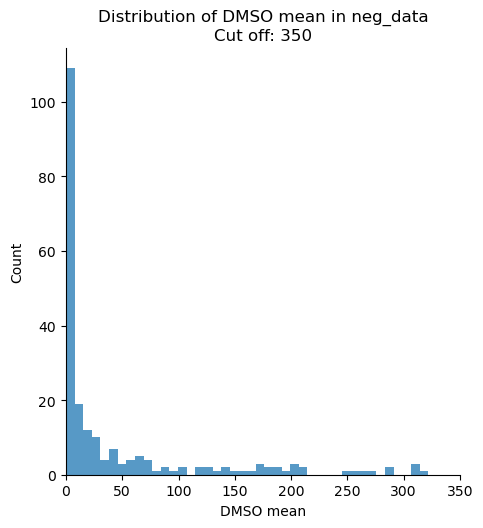

In [19]:
# plot the distribution of the value of DMSO mean in measurement data
sns.displot(neg_measure['DMSO mean'], kde = False, bins = 10000)

plt.xlim(0, 350)

plt.title('Distribution of DMSO mean in neg_data\nCut off: 350')


Text(0.5, 1.0, 'Distribution of DMSO mean in pos_data\nCut off: 350')

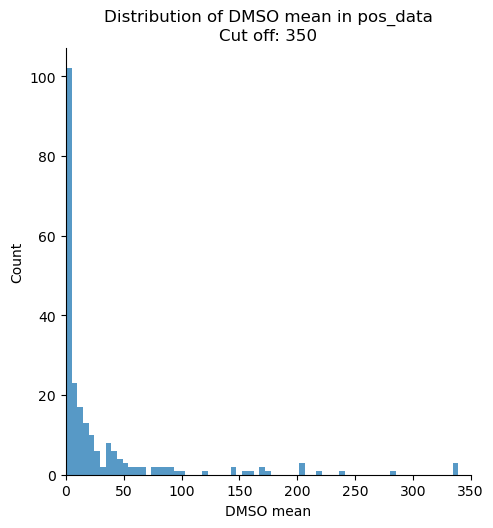

In [20]:
# plot the distribution of the value of DMSO mean in measurement data
sns.displot(pos_measure['DMSO mean'], kde = False, bins = 10000)

plt.xlim(0, 350)

plt.title('Distribution of DMSO mean in pos_data\nCut off: 350')


### Cut

In [43]:
neg_measure_clean_ppm_cut = neg_measure_clean_ppm[neg_measure_clean_ppm['DMSO mean'] > 9]
print('Remaining features (negative):', len(neg_measure_clean_ppm_cut))

pos_measure_clean_ppm_cut = pos_measure_clean_ppm[pos_measure_clean_ppm['DMSO mean'] > 7]
print('Remaining features (positive):', len(pos_measure_clean_ppm_cut))

Remaining features (negative): 100
Remaining features (positive): 102


### Count the fold-change in the cut data

In [44]:
# negative data
neg_measure_cut = neg_measure_clean_ppm_cut.assign(sts_fold = lambda x: x['STS mean'] / x['DMSO mean'],
                                                   fas_fold = lambda x: x['Fas mean'] / x['DMSO mean'],
                                                   rsl_fold = lambda x: x['RSL mean'] / x['DMSO mean'],
                                                   nec_fold = lambda x: x['Nec mean'] / x['DMSO mean'])
neg_measure_cut

,Compound,iden,DMSO mean,STS mean,Fas mean,RSL mean,Nec mean,sts_fold,fas_fold,rsl_fold,nec_fold
5,0.51_611.1454m/z,1,173.447799,89.255274,339.040271,2119.591137,486.028635,0.514594,1.954711,12.220340,2.802161
6,0.53_198.0399m/z,5,183.253967,81.526862,168.832567,568.847811,129.299032,0.444885,0.921304,3.104150,0.705573
7,0.55_172.0600m/z,4,2297.109797,1046.823146,2022.522073,8179.865426,1794.278135,0.455713,0.880464,3.560938,0.781102
8,0.55_418.9552m/z,5,56.261195,354.563851,536.650997,470.452775,415.178050,6.302103,9.538564,8.361941,7.379474
11,0.55_606.0741m/z,4,1839.382273,4141.655413,5059.161052,18720.894027,1890.527535,2.251656,2.750467,10.177816,1.027806
...,...,...,...,...,...,...,...,...,...,...,...
628,0.55_402.0107m/z,2,997.769363,192.434068,365.022764,2178.849902,211.642628,0.192864,0.365839,2.183721,0.212116
630,0.55_173.0636m/z,1,188.904521,92.528819,180.224687,604.114648,154.073892,0.489818,0.954052,3.197989,0.815618
633,0.53_641.1329m/z,2,103.384659,22.708988,94.565213,817.557957,55.498041,0.219655,0.914693,7.907923,0.536811
634,0.53_362.0506m/z,6,310.452428,275.637562,444.080976,1752.891578,52.589923,0.887858,1.430432,5.646249,0.169398


In [45]:
# positive data
pos_measure_cut = pos_measure_clean_ppm_cut.assign(sts_fold = lambda x: x['STS mean'] / x['DMSO mean'],
                                                   fas_fold = lambda x: x['Fas mean'] / x['DMSO mean'],
                                                   rsl_fold = lambda x: x['RSL mean'] / x['DMSO mean'],
                                                   nec_fold = lambda x: x['Nec mean'] / x['DMSO mean'])
pos_measure_cut

,Compound,iden,DMSO mean,STS mean,Fas mean,RSL mean,Nec mean,sts_fold,fas_fold,rsl_fold,nec_fold
0,1.14_612.1517n,1,2288.762815,1207.620813,4947.243497,20650.331413,5625.070807,0.527630,2.161536,9.022486,2.457691
2,1.14_347.0624n,9,51.615830,68.153687,121.794285,2083.027081,20.412975,1.320403,2.359630,40.356361,0.395479
3,1.14_307.0837n,5,171.177438,220.141501,1099.934485,5647.605221,3064.169156,1.286043,6.425698,32.992696,17.900543
6,2.19_311.1233n,3,84.609149,203.013555,301.819138,137.240405,197.514217,2.399428,3.567216,1.622052,2.334431
9,3.02_318.1317n,4,45.773379,588.728987,182.331870,856.375628,41.443459,12.861821,3.983361,18.709032,0.905405
...,...,...,...,...,...,...,...,...,...,...,...
566,0.97_428.0360m/z,5,97.780054,3.466876,70.385781,2000.325291,1.659481,0.035456,0.719838,20.457396,0.016972
568,0.94_217.0680m/z,18,142.820780,155.023471,197.785759,130.620489,274.431095,1.085441,1.384853,0.914576,1.921507
574,0.87_280.0937m/z,4,48.959334,72.988210,108.370346,232.016521,127.140110,1.490793,2.213477,4.738964,2.596851
575,0.77_318.9369m/z,2,10.350023,24.535820,22.372632,23.694289,8.940672,2.370605,2.161602,2.289298,0.863831


### Filter the identification data with cut measurement data

In [46]:
# negative data
neg_iden_cut = neg_iden_clean_ppm[neg_iden_clean_ppm['Compound'].isin(neg_measure_cut['Compound'])]
len(list(set(neg_iden_cut['Compound']))) # check the remain feature is the same as the cut data

100

In [47]:
# positive data
pos_iden_cut = pos_iden_clean_ppm[pos_iden_clean_ppm['Compound'].isin(pos_measure_cut['Compound'])]
len(list(set(pos_iden_cut['Compound']))) # check the remain feature is the same as the cut data

102

In [38]:
print(neg_iden_cut)

NameError: name 'neg_iden_cut' is not defined

In [50]:
# save the identification data to csv file
neg_iden_cut.to_csv('/Volumes/Johnathan/1_Metabolomic/1_Data/20231204_Cell-Death_Metabolite_Sup_HMDB/Processed_Data/cut/neg_iden_cut.csv', index = False)
pos_iden_cut.to_csv('/Volumes/Johnathan/1_Metabolomic/1_Data/20231204_Cell-Death_Metabolite_Sup_HMDB/Processed_Data/cut/pos_iden_cut.csv', index = False)

# save the measurement data to csv file
neg_measure_cut.to_csv('/Volumes/Johnathan/1_Metabolomic/1_Data/20231204_Cell-Death_Metabolite_Sup_HMDB/Processed_Data/cut/neg_measure_cut.csv', index = False)
pos_measure_cut.to_csv('/Volumes/Johnathan/1_Metabolomic/1_Data/20231204_Cell-Death_Metabolite_Sup_HMDB/Processed_Data/cut/pos_measure_cut.csv', index = False)